In [1]:
from ldm.models.autoencoder import AutoencoderKL

from ldm.data.cifar_dataset import get_CIFAR10_data

from omegaconf import OmegaConf
import importlib
import torch
import sys

import matplotlib.pyplot as plt



In [2]:
def instantiate_from_config(config):
    if not "target" in config:
        raise KeyError("Expected key `target` to instantiate.")
    return get_obj_from_str(config["target"])(**config.get("params", dict()))

def get_obj_from_str(string, reload=False):
    module, cls = string.rsplit(".", 1)
    if reload:
        module_imp = importlib.import_module(module)
        importlib.reload(module_imp)
    return getattr(importlib.import_module(module, package=None), cls)


In [16]:
cfg_path = "/kuacc/users/bbiner21/Github/latent-diffusion/configs/autoencoder/ae_custom_infer.yaml"

config = OmegaConf.load(cfg_path) 

model = instantiate_from_config(config.model)

making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 4, 32, 32) = 4096 dimensions.
making attention of type 'vanilla' with 512 in_channels
loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth
Restored from /kuacc/users/bbiner21/Github/latent-diffusion/logs/2022-09-19T12-42-42_ae_custom_kl_32-32-4/checkpoints/epoch=000007.ckpt
checkpoint path is /kuacc/users/bbiner21/Github/latent-diffusion/logs/2022-09-19T12-42-42_ae_custom_kl_32-32-4/checkpoints/epoch=000007.ckpt


In [4]:
x_train, y_train, x_val, y_val, x_test, y_test = get_CIFAR10_data()

# x_train = (x_train + 1) / 2
new_x_train = (x_train.reshape(x_train.shape[0],3,32,32)).transpose(0,2,3,1)


1.0
-1.0


In [5]:
truck_img = torch.from_numpy(new_x_train[2,:].transpose(2,0,1)).unsqueeze(0)

In [6]:
truck_img.mean()

tensor(0.0489)

In [17]:
rec_truck, post = model(truck_img)

In [18]:
rec_truck.mean()

tensor(0.0431, grad_fn=<MeanBackward0>)

In [9]:
truck_img.min()

tensor(-0.8431)

In [9]:
truck_np = (truck_img.squeeze(0)).cpu().detach().numpy().transpose(1,2,0)
print(truck_np.mean())
norm_gt = (truck_np-truck_np.min())/(truck_np.max() - truck_np.min() )
truck_scaled_gt = (truck_np + 1) / 2

0.04894558


In [10]:
rec_truck_np = (rec_truck.squeeze(0)).cpu().detach().numpy().transpose(1,2,0)
print(rec_truck_np.mean())
norm = (rec_truck_np-rec_truck_np.min())/(rec_truck_np.max() - rec_truck_np.min() )
rec_truck_scaled = (rec_truck_np + 1) / 2


0.05434565


In [19]:
rec_truck_np = (rec_truck.squeeze(0)).cpu().detach().numpy().transpose(1,2,0)
print(rec_truck_np.mean())
norm_2 = (rec_truck_np-rec_truck_np.min())/(rec_truck_np.max() - rec_truck_np.min() )
rec_truck_scaled_2 = (rec_truck_np + 1) / 2

0.043122347


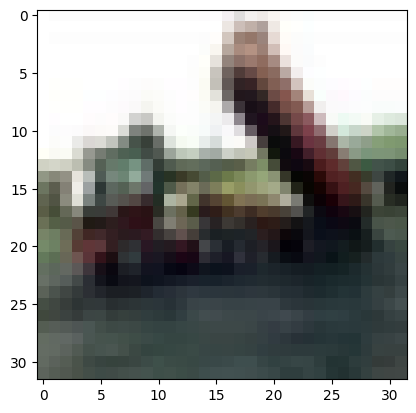

In [11]:
plt.imshow(norm_gt)

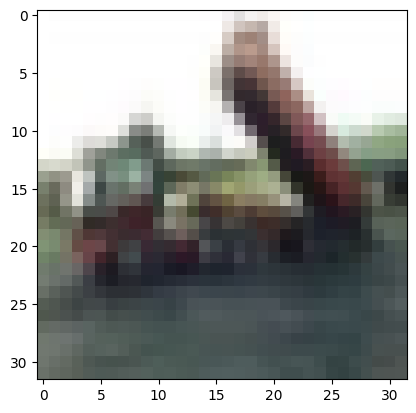

In [12]:
plt.imshow(truck_scaled_gt)

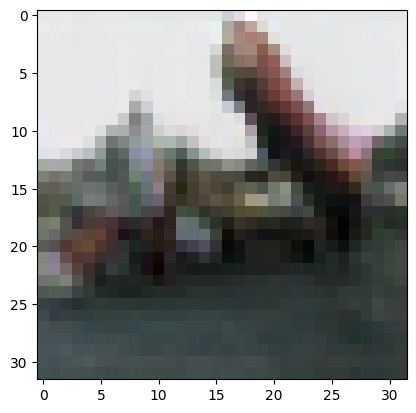

In [13]:
plt.imshow(norm)

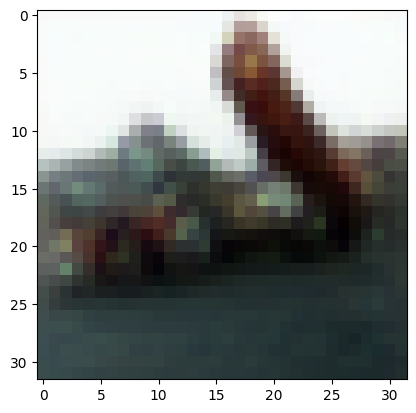

In [20]:
plt.imshow(norm_2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


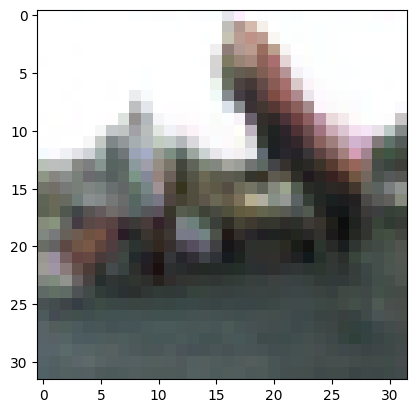

In [15]:
plt.imshow(rec_truck_scaled)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


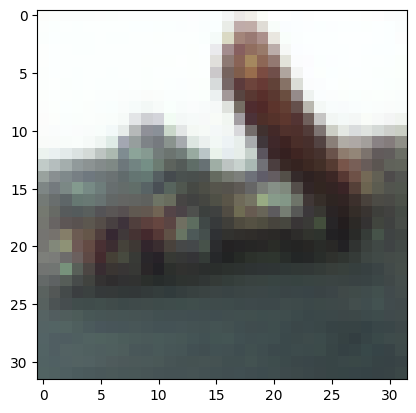

In [21]:
plt.imshow(rec_truck_scaled_2)

In [16]:
rec_truck_scaled.min()

-0.03685677

In [ ]:
rec_truck_np 

In [32]:
rec_truck_np.shape

(32, 32, 3)

In [65]:
truck_np = (truck_img.squeeze(0)).numpy().transpose(1,2,0)

In [66]:
truck_np.shape

(32, 32, 3)

In [103]:
max_min = rec_truck_np.max() - rec_truck_np.min() 

In [105]:
max_min

2.1450014

In [104]:
norm = (rec_truck_np-rec_truck_np.min())/max_min

In [107]:
norm.max()

1.0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


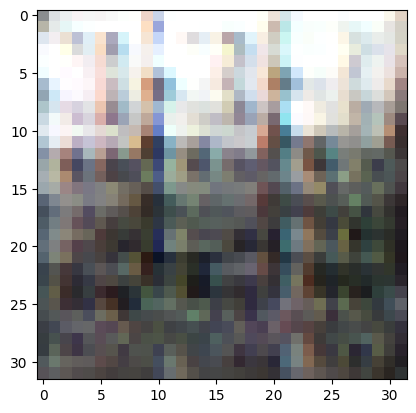

In [36]:
plt.imshow(rec_truck_np)

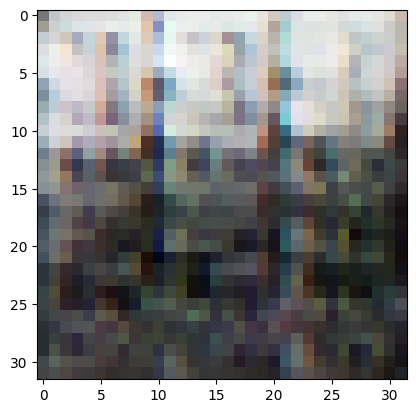

In [42]:
plt.imshow(norm)

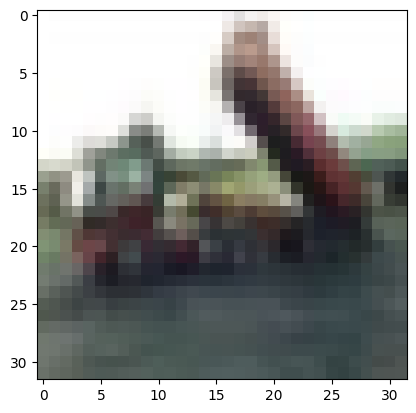

In [51]:
import matplotlib.pyplot as plt

plt.imshow(new_x_train[2,:])